These are the answers to the applied questions in chapter 2 of the book. I have formatted this to take on a general exploratory analysis of the data using the direction of the questions.

This chapter covers a 10,000 foot view on how to decide what methods to use when analyzing data and how to assess it's effectiveness when attempting to use various methods of prediction.

The chapter is a soft introduction in beginning to use computation to explore data.

The data set being used is an included data set and more information can be found here: [College](https://islp.readthedocs.io/en/latest/datasets/College.html). In short, it is an older dataset from 1995 and is the statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

In [1]:
import pandas as pd

college = pd.read_csv('../allCSVfiles/College.csv', index_col=0)
college = college.rename(columns={'Unnamed: 0' : 'College'})
college.sample(n=5)

# loading things in
# for a data dictionary of the included variables: https://islp.readthedocs.io/en/latest/datasets/College.html

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Fayetteville State University,No,1455,1064,452,1,16,2632,617,6806,2550,350,766,75,75,15.1,10,6972,24
Bluffton College,Yes,692,514,209,20,50,760,81,9900,3990,400,900,76,71,13.3,19,9073,58
Queens College,Yes,516,392,154,32,62,630,549,11020,4970,610,1900,73,75,14.0,36,9315,58
Sioux Falls College,Yes,437,400,211,13,35,614,271,8990,3064,500,1700,73,73,14.8,7,7881,48
College of Saint Catherine,Yes,511,411,186,23,51,1692,562,12224,4440,450,1000,63,87,11.5,32,7315,77


This doesn't really give us a sense of the data but it is merely to confirm that it is loaded in and that the index has been set successfully.

In [2]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


I am not a huge fan of the numbers on numbers on numbers approach but we get a little bit of the sense of things going on in the dataset at least with the `.describe()` method.

Next will plot some various values against each other to see if we can spot any initial correlations with `pandas` built-ins, `.plotting.scatter_matrix()`

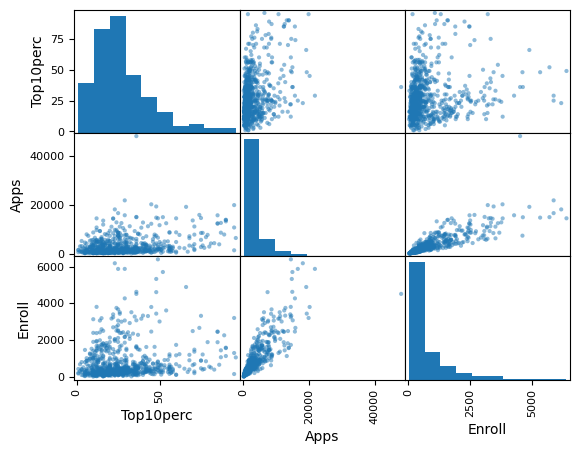

In [3]:
pd.plotting.scatter_matrix(college[['Top10perc','Apps', 'Enroll']]);

We can see that there seems to be a tight cluster of data points for the scatter matrix across the three values.

Students in the top 10% of their graduating high school class appear to apply to, and enroll in colleges that receive a smaller amount of applications and enroll a smaller number of students. We can generalize that this may be because private schools are smaller and that this is where they may fall in the spread. 

However there are many patterns here that "seem to make sense" as far as data goes (that schools appear to enroll small fraction of the applications received) but without digging deeper it might not reveal anything absolute.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

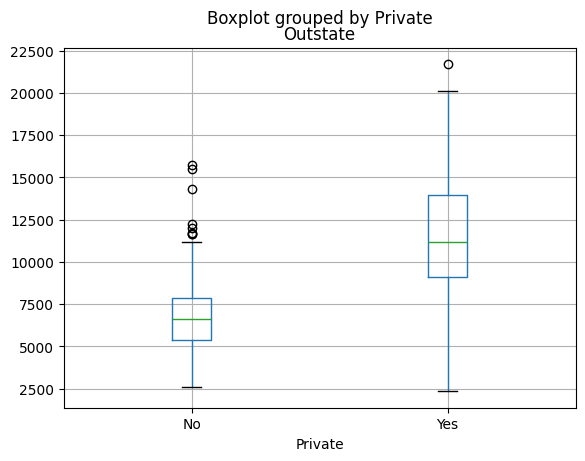

In [4]:
college.boxplot(column='Outstate', by='Private')

This boxplot compares the cost range between private schools and public schools when attending from out of state.

This mostly showcases `pandas`' ability to use built-in graph functionability to make quick data visualizations.

In [5]:
college['Elite'] = pd.cut(college['Top10perc']/college['Enroll'],[0,0.5,1],labels=['No','Yes'])

Above, we are creating a new variable called `Elite`, which takes a look into if the proportion of top 10% of enrolled students are above 50%.

We do this by defining the condition in which we are looking for (where 50% or more of the enrolled class is top 10 percent or more) and then labeling those that do fit this condition with 'Yes' or 'No'.

Another way to say this is that we are considering universities "Elite" if 50% or more of their newly enrolled students are in the top 10% or above from their high school graduating class.

Below we will see that the universities in this classification are very low.

In [6]:
college['Elite'].value_counts()
# value_counts() is a nice quick way to see qualitative values quantatively

No     775
Yes      2
Name: Elite, dtype: int64

<Axes: >

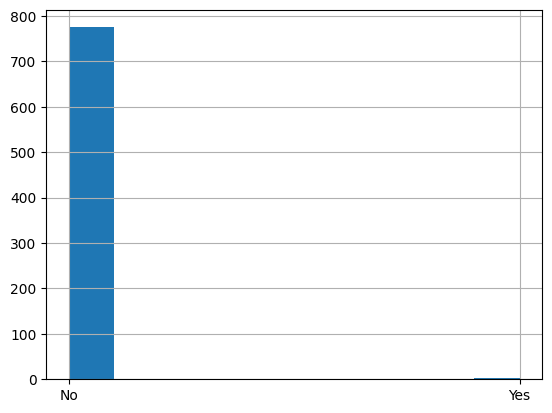

In [7]:
# now for a stark representation
college['Elite'].hist()

# continuing exploraiton

This section concluded with "keep exploring the data" so below we go through creating some of our own metrics to see what we might be able to learn, using only what we have within the data.

First, we define a new metric, `AdmitRate` which we define as `Accept` divided by the amount of `Apps` received.

In [8]:
college['AdmitRate'] = college['Accept']/college['Apps']
college['AdmitRate'].sample(n=10), (college['AdmitRate'].max(), college['AdmitRate'].min())

(Johnson State College                         0.803121
 Angelo State University                       0.565254
 North Carolina State University at Raleigh    0.664284
 Northern Illinois University                  0.674295
 Columbia College                              0.833107
 McMurry University                            0.711073
 Fordham University                            0.684286
 University of Maine at Presque Isle           0.826464
 Stonehill College                             0.630828
 Bluffton College                              0.742775
 Name: AdmitRate, dtype: float64,
 (1.0, 0.15448630655167198))

We can see that our new metric, `AdmitRate` shows between 0 and 1.

`college['AdmitRate'].sample(n=10)` gives us a random sample of values from the DataFrame to see.

Below we can take a look at the admit rate from our previously cooked up `Elite` metric against our `AdmitRate` to see the rate of our Elite schools.

Spoiler: with not that much data than two schools the overall admit rate does not look super different than the data from all the other 775 schools

<Axes: title={'center': 'AdmitRate'}, xlabel='Elite'>

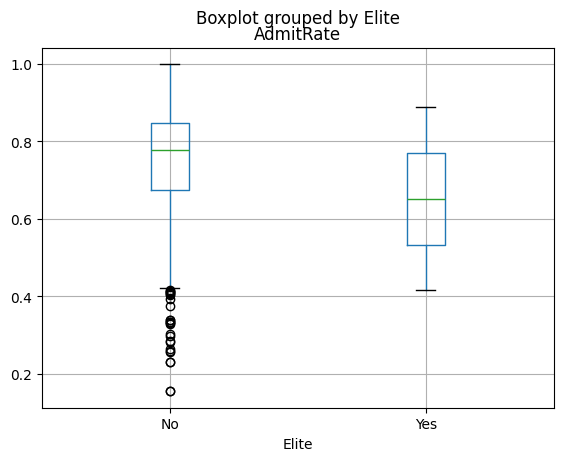

In [9]:
college.boxplot('AdmitRate', by='Elite')

Next, another metric - `Yield`. Yield we will define as the actual amount of students that end up _going_ to school at the particular university. Not all students accepted will end up enrolling at that university.

In [10]:
college['Yield'] = college['Enroll'] / college['Accept']
college[['Yield','Enroll','Accept','Apps','AdmitRate']].sample(n=15)

,Yield,Enroll,Accept,Apps,AdmitRate
University of the Pacific,0.291437,582,1997,2459,0.812119
Christendom College,0.708333,51,72,81,0.888889
Ohio Northern University,0.285653,669,2342,2936,0.797684
Central Connecticut State University,0.356240,902,2532,4158,0.608947
Viterbo College,0.523166,271,518,647,0.800618
Manchester College,0.298005,239,802,1004,0.798805
Notre Dame College,0.330247,107,324,379,0.854881
Wayne State College,0.527312,724,1373,1373,1.000000
Shippensburg University of Penn.,0.340140,1116,3281,5818,0.563939
Earlham College,0.272366,274,1006,1358,0.740795


Here we can then see our new metrics all in a nice display. What might be interesting to look further into is if schools with a high admit rate also have a high yield as well. We can take a look at that with a scatter plot to start.

<Axes: xlabel='AdmitRate', ylabel='Yield'>

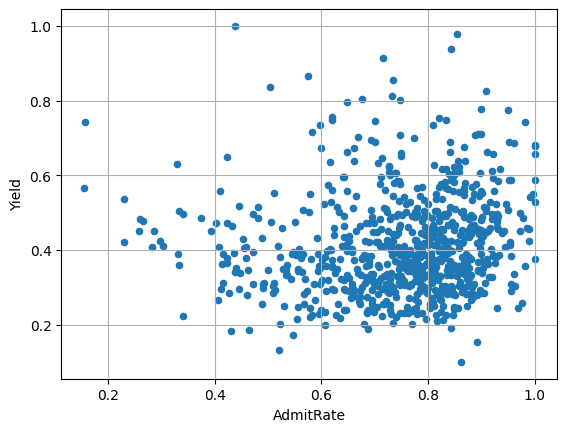

In [21]:
college.plot.scatter(x='AdmitRate', y='Yield', grid=True)

Upon first glance, we can see that a higher `AdmitRate` is showing a lower `Yield` as well. It appears that the data clusters right around a 0.8 Admit Rate and just below a Yield of 0.4. Let's see what else might be revealed if we zero in on this "sweet spot" of student decision.

I'm going to guesstimate some ranges in which to separate out these highly preferred colleges - more for simplicity of analysis. 

The code below is going to select a certain range in `AdmitRate` and `Yield` where it appears the data clusters around. This isn't exact by any means but is mostly taking an exploratory direction.

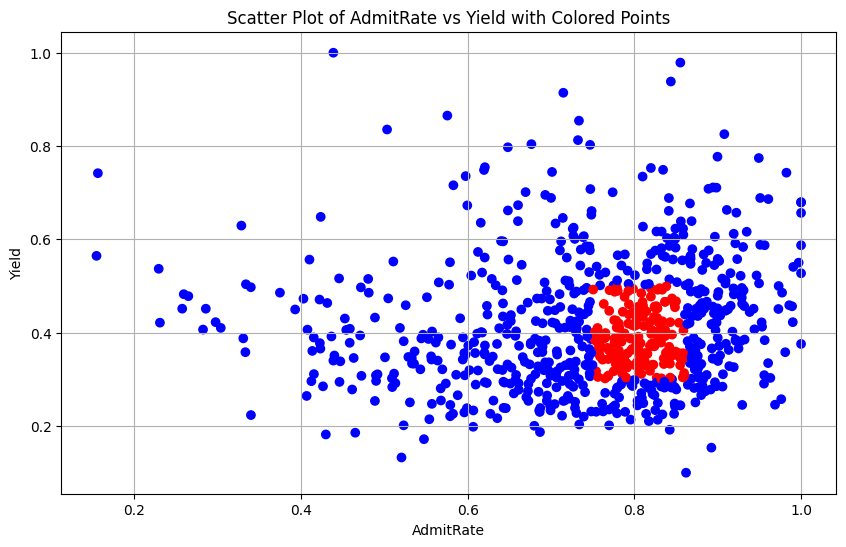

In [29]:
import matplotlib.pyplot as plt

high_freq_admit_condition = (college['AdmitRate'] >= 0.75) & (college['AdmitRate'] <= 0.86)
high_yield_condition = (college['Yield'] > 0.3) & (college['Yield'] < .5)
combined_condition = high_freq_admit_condition & high_yield_condition
preferred_colleges = college[combined_condition]
# preferred_colleges.describe()
college['Color'] = combined_condition.map({True: 'red', False : 'blue'})

plt.figure(figsize=(10,6))
scatter = plt.scatter(college['AdmitRate'], college['Yield'], c=college['Color'])

plt.xlabel('AdmitRate')
plt.ylabel('Yield')
plt.title('Scatter Plot of AdmitRate vs Yield with Colored Points')
plt.grid(True)

plt.show()

All the red dots above are all the colleges within guesstimate range. Let's see if we can figure out why these are chosen more using the data we have available.

In [60]:
summary_df = pd.DataFrame({
    'Original Mean' : college.mean(numeric_only=True),
    'Preferred Mean': preferred_colleges.mean(numeric_only=True),
    'Original Max' : college.max(numeric_only=True),
    'Preferred Max' : preferred_colleges.max(numeric_only=True),
    'Original Minimum' : college.min(numeric_only=True),
    'Preferred Minimum' : preferred_colleges.min(numeric_only=True)
})

summary_df.insert(2,'||.', '||')
summary_df.insert(5, '.||', '||')

summary_df

,Original Mean,Preferred Mean,||.,Original Max,Preferred Max,.||,Original Minimum,Preferred Minimum
Apps,3001.638353,2347.351955,||,48094.0,21804.000000,||,81.000000,141.000000
Accept,2018.804376,1883.407821,||,26330.0,18744.000000,||,72.000000,118.000000
Enroll,779.972973,721.581006,||,6392.0,6180.000000,||,35.000000,46.000000
Top10perc,27.558559,23.497207,||,96.0,60.000000,||,1.000000,2.000000
Top25perc,55.796654,51.932961,||,100.0,89.000000,||,9.000000,13.000000
F.Undergrad,3699.907336,3282.547486,||,31643.0,26640.000000,||,139.000000,199.000000
P.Undergrad,855.298584,748.430168,||,21836.0,7585.000000,||,1.000000,1.000000
Outstate,10440.669241,10479.776536,||,21700.0,18460.000000,||,2340.000000,4515.000000
Room.Board,4357.526384,4306.776536,||,8124.0,7398.000000,||,1780.000000,2380.000000
Books,549.380952,513.385475,||,2340.0,1000.000000,||,96.000000,110.000000


Something that sticks out right away is the numbers in `Outstate`,`Room.Board`, and `Books` which are measures of cost per these units of tuition. The minimums seem to be significantly higher than the original minimums. I am also seeing extremly higher rates of `Expend` which is the instructional expenditure of each student. This leads me to an interesting prediction..

There is one particular variable that is not showing in this table that might help us understand why these colleges are preferred and why we might be seeing higher spending rates overall.

In [62]:
preferred_colleges['Private'].value_counts()

Yes    139
No      40
Name: Private, dtype: int64

Aha! 

The missing variable was if they were private schools or not, and it appears that - from this data we can slightly conclude that students preferred schools are mostly private ones. 

That will conclude this analysis for now. 

Thanks for reading! Feel free to reach out to me if you have any questions.